# Importation des packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.spatial.distance import cdist
from math import pi

# Présentation de la problématique et chargement des données``


## Analyse de la base de données 'Live'

La base de données 'Live' contient des informations collectées auprès de vendeurs sur Facebook en Thaïlande. Elle comprend différents types de statuts (photo, vidéo, etc.) ainsi que diverses métriques telles que les 'likes', 'shares', et 'comments'. Les détails précis des variables peuvent varier en fonction du fichier de données spécifique utilisé.

La base de données contient les inforamtions suivantes: 
- `status_id` : L'ID unique de chaque publication.
- `status_type` : Le type de publication (par exemple, photo, statut, lien, vidéo).
- `status_published` : La date et l'heure de la publication.
- `num_reactions` : Le nombre total de réactions à la publication (par exemple, likes, love, wow, haha, sad, angry).
- `num_comments` : Le nombre total de commentaires sur la publication.
- `num_shares` : Le nombre total de partages de la publication.
- `num_likes` : Le nombre total de "J'aime" pour la publication.
- `num_loves` : Le nombre total de "Love" réactions pour la publication.
- `num_wows` : Le nombre total de "Wow" réactions pour la publication.
- `num_hahas` : Le nombre total de "Haha" réactions pour la publication.
- `num_sads` : Le nombre total de "Sad" réactions pour la publication.
- `num_angrys` : Le nombre total de "Angry" réactions pour la publication.
- `ColumnX` : Description de la colonne X (à répéter pour toutes les autres colonnes)


L'objectif de cette analyse est **de découvrir des modèles et des tendances dans les données qui peuvent nous aider à comprendre comment les utilisateurs de Facebook en Thaïlande** interagissent avec les publications des vendeurs en ligne. 
Ces informations peuvent être utilisées pour optimiser la stratégie de contenu des vendeurs, améliorer l'engagement des utilisateurs et, finalement, augmenter les ventes.


In [2]:
# Charger la base de données
df = pd.read_csv('Live.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
# Suppression des colonnes 
df = df.drop(['Column1', 'Column2', 'Column3', 'Column4','status_published'], axis=1)
df.head()


,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0


In [4]:
# Mettre l'index 
df = df.set_index('status_id')

In [5]:
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_id,,,,,,,,,,
246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0
246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0
246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0
246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0
246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1050855161656896_1061863470556065,photo,89,0,0,89,0,0,0,0,0
1050855161656896_1061334757275603,photo,16,0,0,14,1,0,1,0,0
1050855161656896_1060126464063099,photo,2,0,0,1,1,0,0,0,0


In [6]:
# Vérification des données manquantes
df.isnull().sum()

status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

In [7]:
df.describe(include="all")

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
unique,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,photo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,NaN,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000


## Description des données

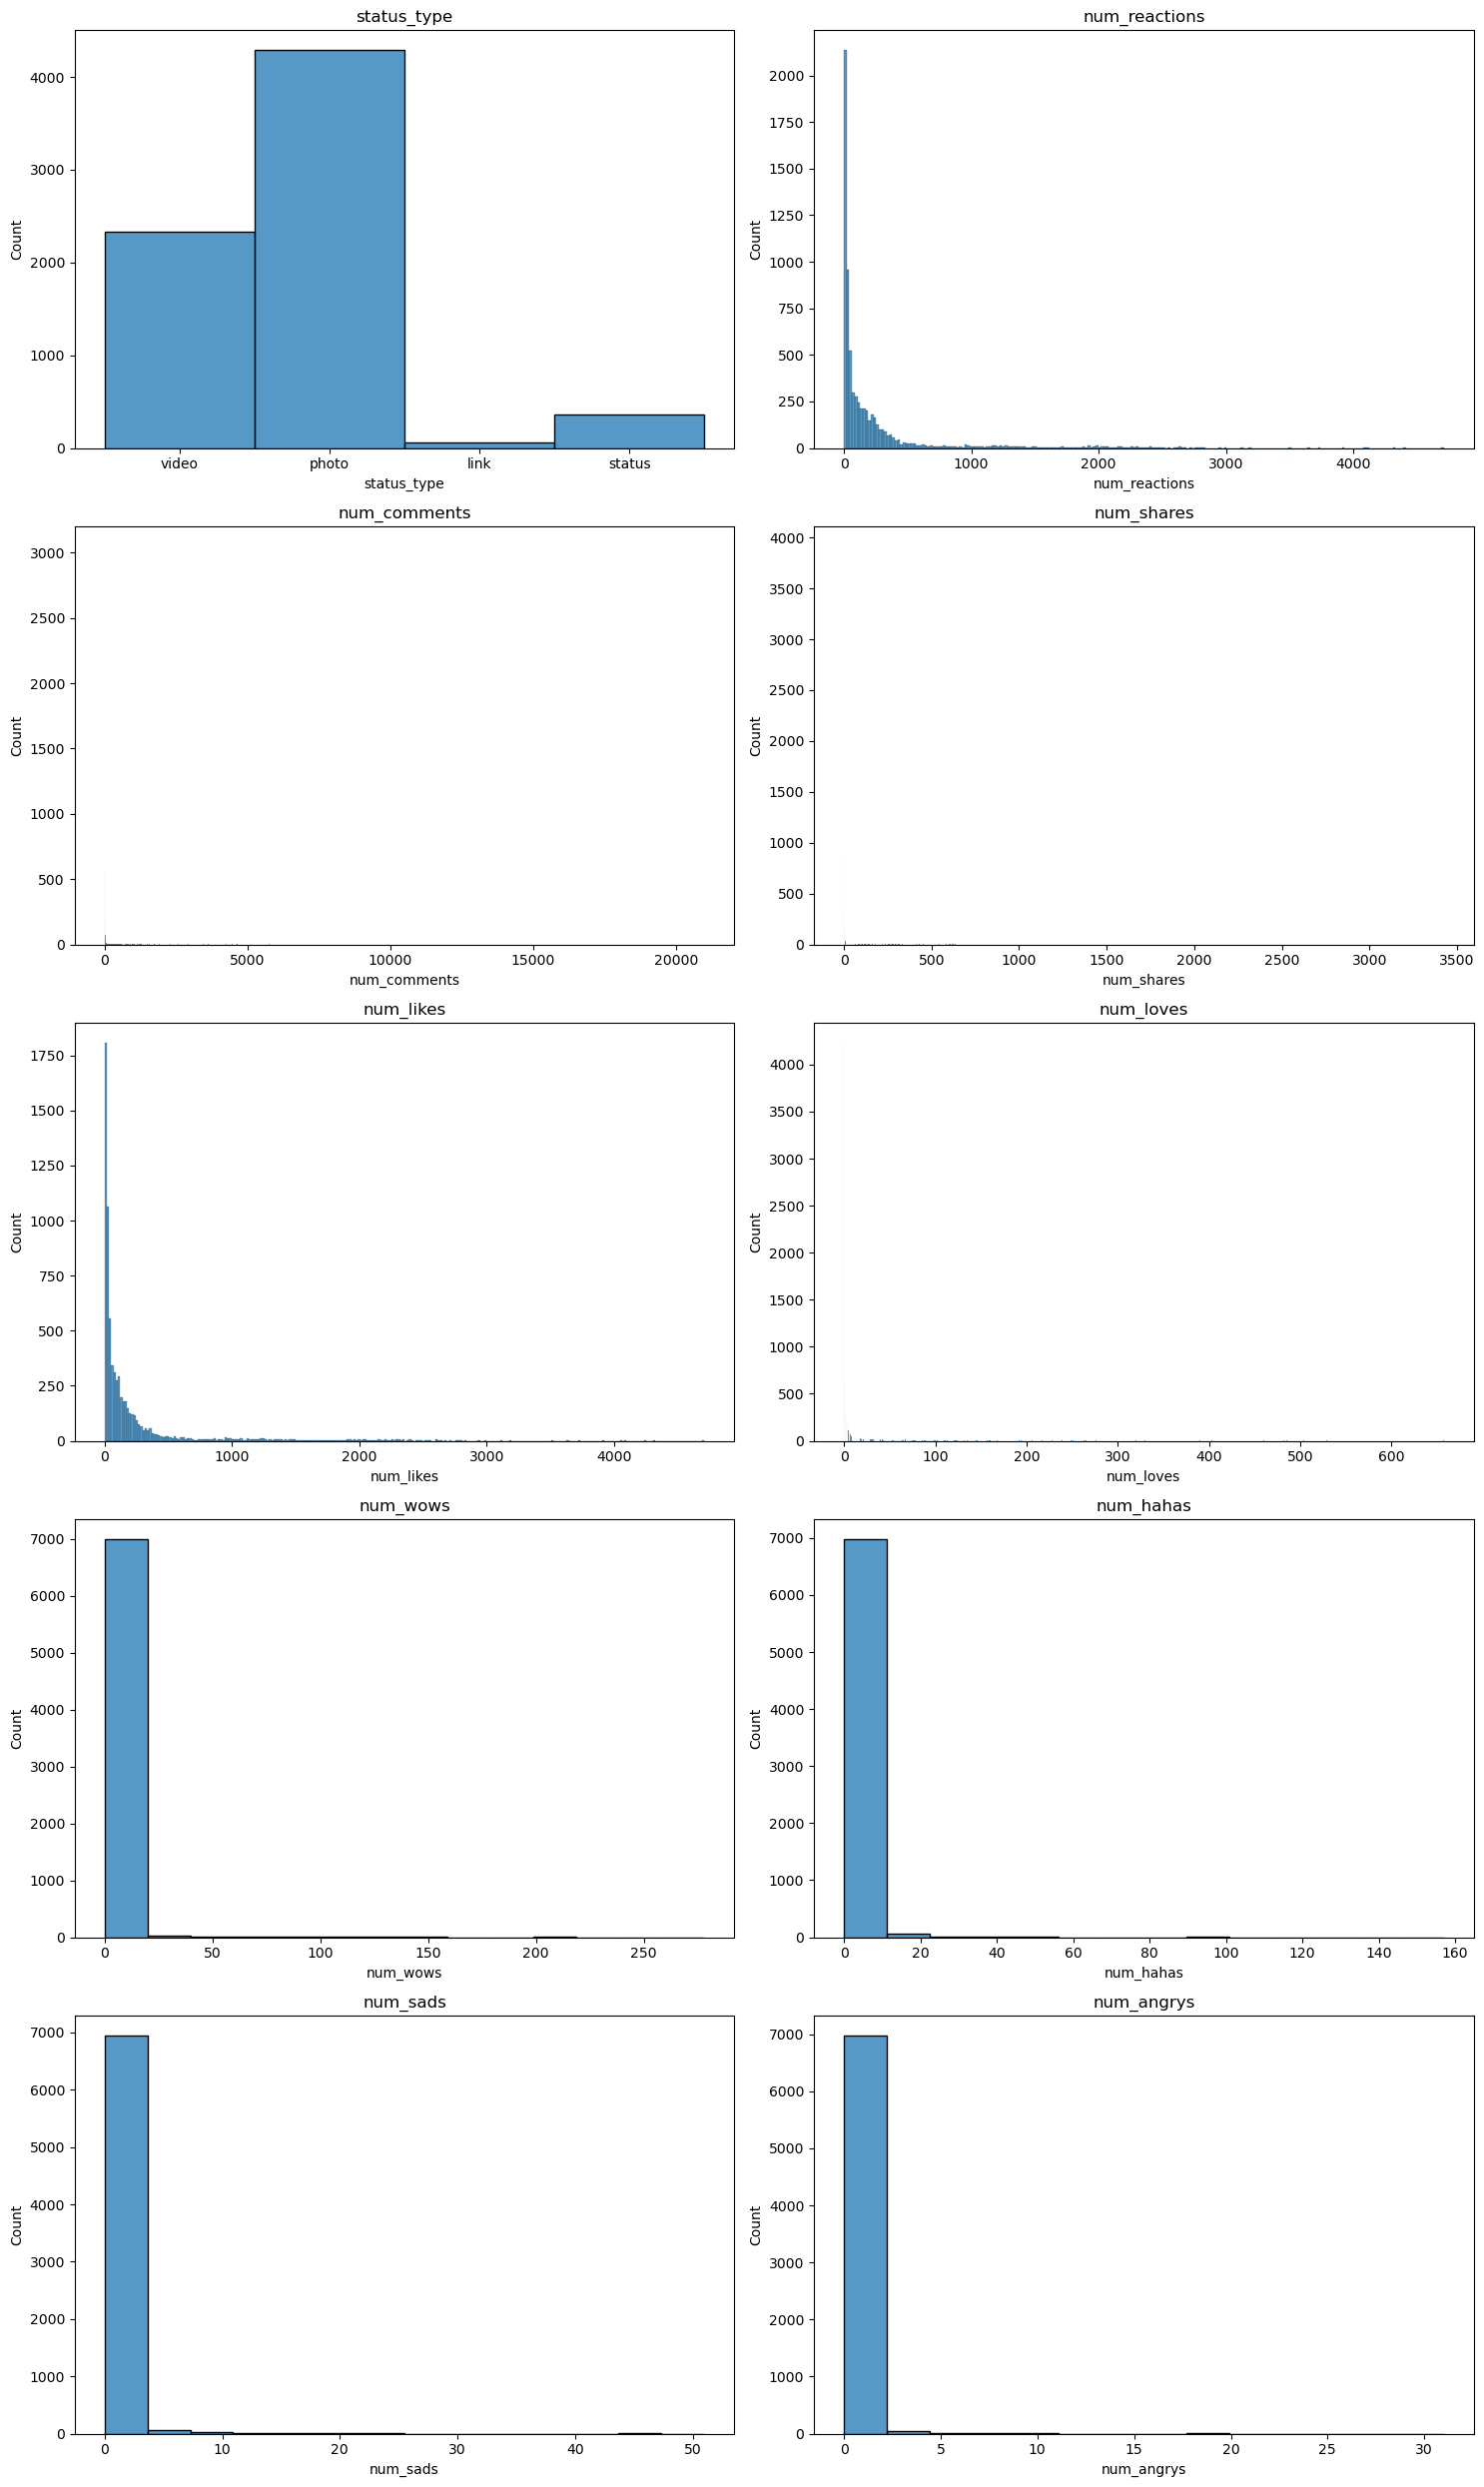

In [8]:

num_cols = len(df.columns)
num_rows = num_cols // 2 if num_cols % 2 == 0 else num_cols // 2 + 1

plt.figure(figsize=(15, num_rows*5))
for i, column in enumerate(df.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.histplot(df[column].dropna())
    plt.title(column)
plt.tight_layout() # pour éviter le chevauchement des graphiques
plt.show()

In [ ]:
df.describe()

# Analyses bivariées

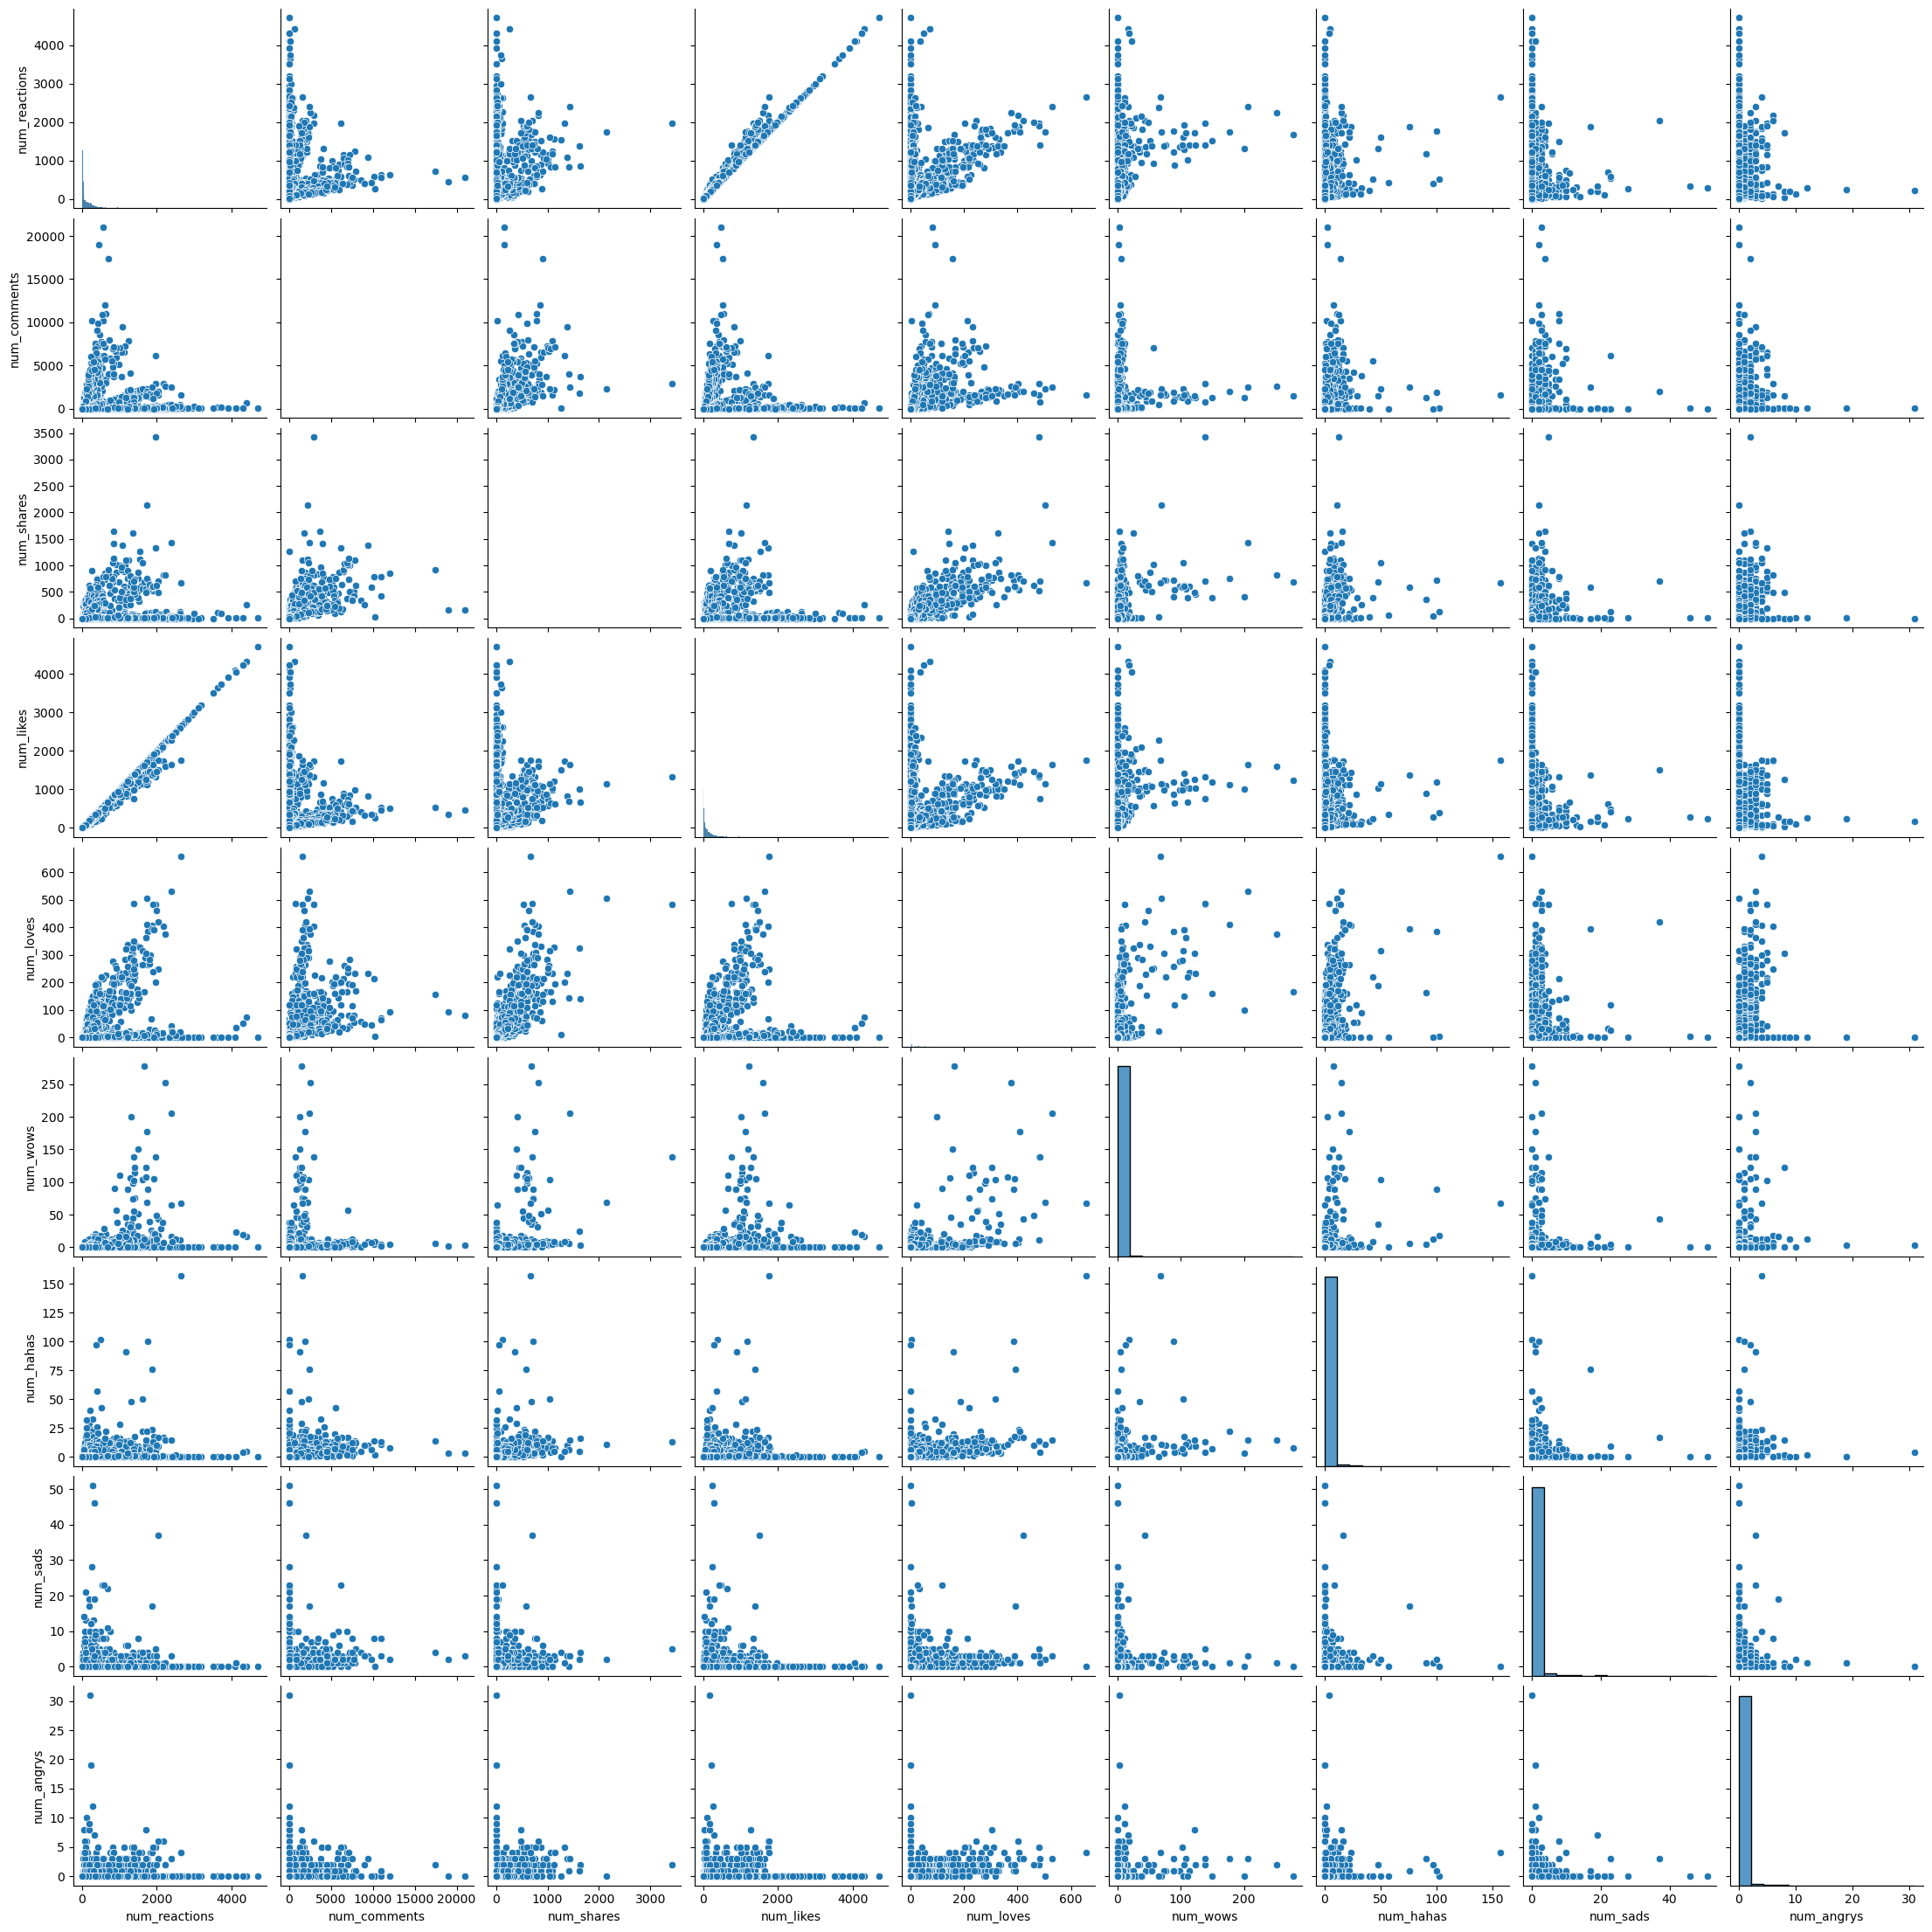

In [9]:
# Graphiques bivariés
sns.pairplot(df)
plt.show()


In [10]:
# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])

# Calculer la corrélation de Spearman
correlation_spearman = df_numeric.corr(method='spearman')

# Afficher le résultat
correlation_spearman

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,1.000000,0.731731,0.557824,0.996848,0.566720,0.481648,0.401321,0.272188,0.261825
num_comments,0.731731,1.000000,0.624171,0.708545,0.638492,0.496706,0.541926,0.354643,0.355031
num_shares,0.557824,0.624171,1.000000,0.526672,0.635137,0.460756,0.567575,0.358708,0.364631
num_likes,0.996848,0.708545,0.526672,1.000000,0.534878,0.466170,0.361442,0.249582,0.235741
num_loves,0.566720,0.638492,0.635137,0.534878,1.000000,0.627628,0.618892,0.394369,0.380992
num_wows,0.481648,0.496706,0.460756,0.466170,0.627628,1.000000,0.481603,0.306713,0.313149
num_hahas,0.401321,0.541926,0.567575,0.361442,0.618892,0.481603,1.000000,0.441237,0.482089
num_sads,0.272188,0.354643,0.358708,0.249582,0.394369,0.306713,0.441237,1.000000,0.404778
num_angrys,0.261825,0.355031,0.364631,0.235741,0.380992,0.313149,0.482089,0.404778,1.000000


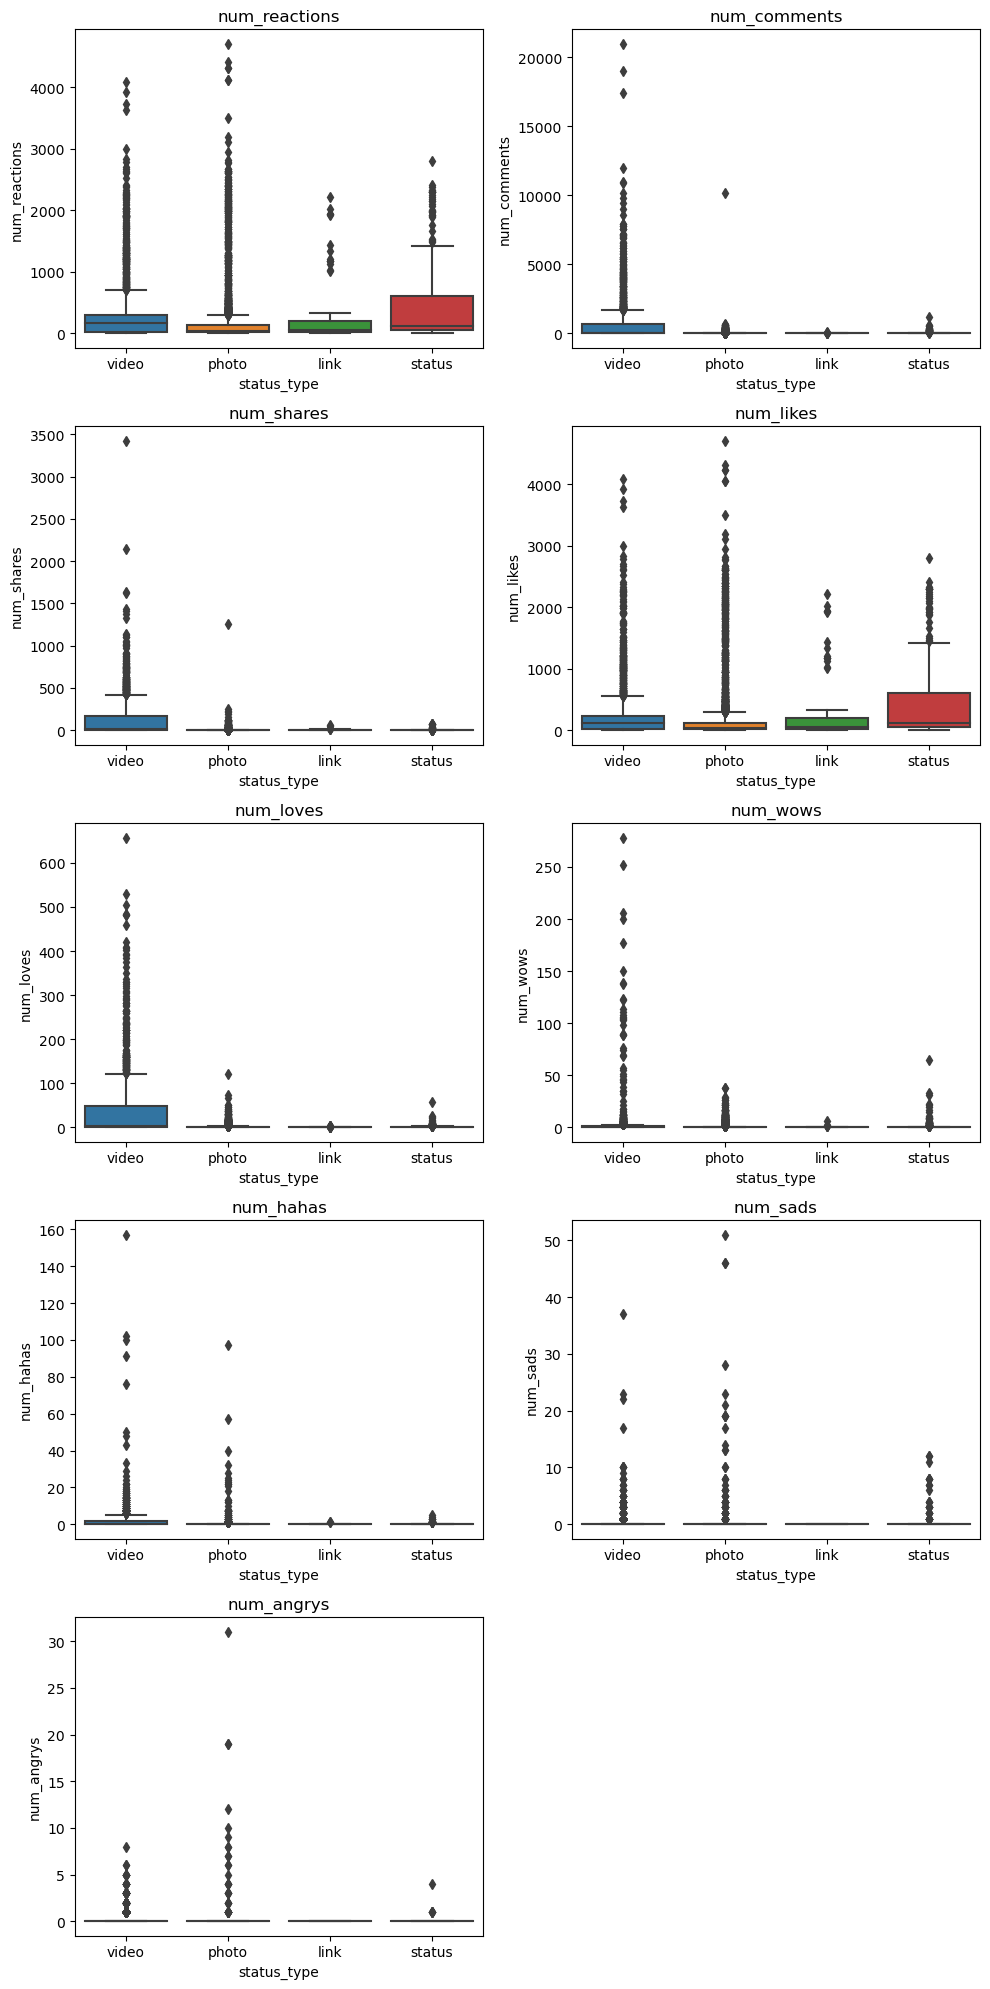

In [11]:
# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])

# Ajouter le type de publication aux données numériques
df_numeric['status_type'] = df['status_type']

# Créer un boxplot pour chaque colonne numérique
num_cols = len(df_numeric.columns) - 1  # -1 pour exclure 'status_type'

# Nombre de lignes pour les sous-graphiques
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

plt.figure(figsize=(10, 4 * num_rows))
for i, column in enumerate(df_numeric.columns.drop('status_type'), start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='status_type', y=column, data=df_numeric)
    plt.title(column)

plt.tight_layout()
plt.show()


# Réalisation de l'ACP

In [12]:
 # Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])

# Normaliser les données
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_numeric)

# ACP
pca = PCA()
df_pca = pca.fit_transform(df_normalized)

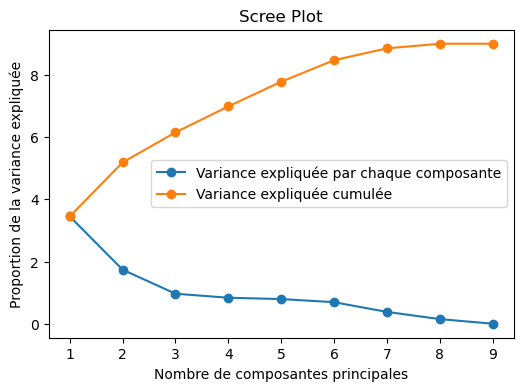

In [13]:
# Calculer la variance expliquée cumulée
explained_variance = pca.explained_variance_

cumulative_explained_variance = np.cumsum(explained_variance)

# Créer un scree plot avec la variance expliquée cumulée
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'o-', label='Variance expliquée par chaque composante')
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, 'o-', label='Variance expliquée cumulée')
plt.title('Scree Plot')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Proportion de la variance expliquée')
plt.legend()
plt.show()


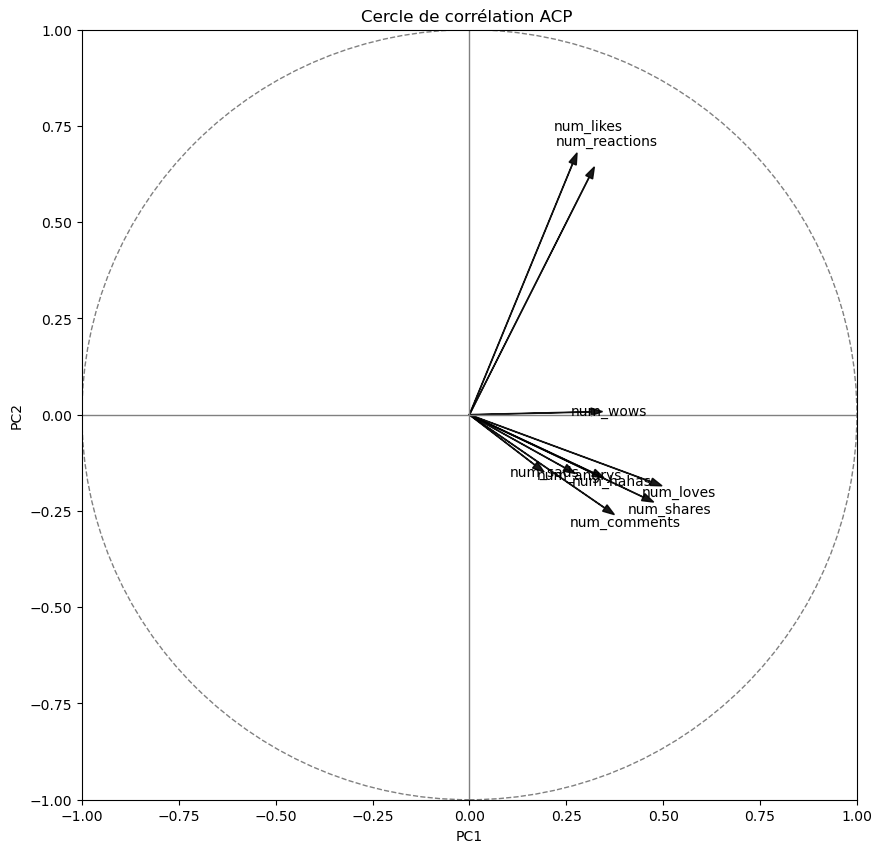

In [15]:


# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

# Créer la figure
plt.figure(figsize=(10, 10))

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, df_numeric.columns[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP ')

# Afficher la figure
plt.show()


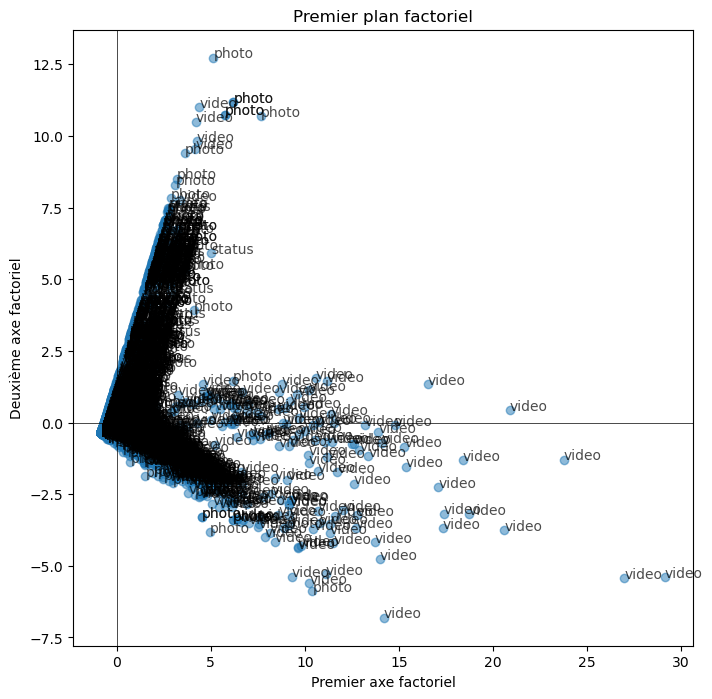

In [16]:
# Premier plan factoriel
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5)

# Ajouter des étiquettes pour chaque point (type de publication)
for i, status_type in enumerate(df['status_type']):
    ax.annotate(status_type, (df_pca[i, 0], df_pca[i, 1]), alpha=0.7)

# Ajouter des axes
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

# Labels des axes
ax.set_xlabel('Premier axe factoriel')
ax.set_ylabel('Deuxième axe factoriel')

# Titre du graphique
plt.title('Premier plan factoriel')

# Afficher le graphique
plt.show()

# Détermination des clusters avec les Kmeans

In [18]:
# Choix du nombre optimal de clusters (méthode du coude et du score de silhouette)
inertias = []
silhouettes = []
K = range(2, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(df_normalized)
    inertias.append(kmeanModel.inertia_)
    silhouettes.append(silhouette_score(df_normalized, kmeanModel.labels_))

/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

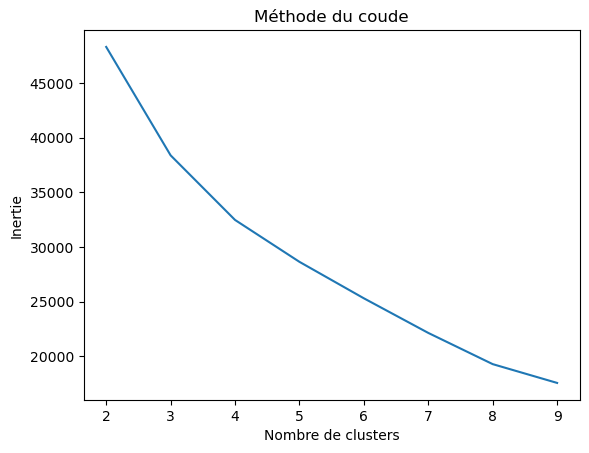

In [19]:

# Tracer la courbe de l'inertie en fonction du nombre de clusters
plt.plot(range(2, 10), inertias)
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()


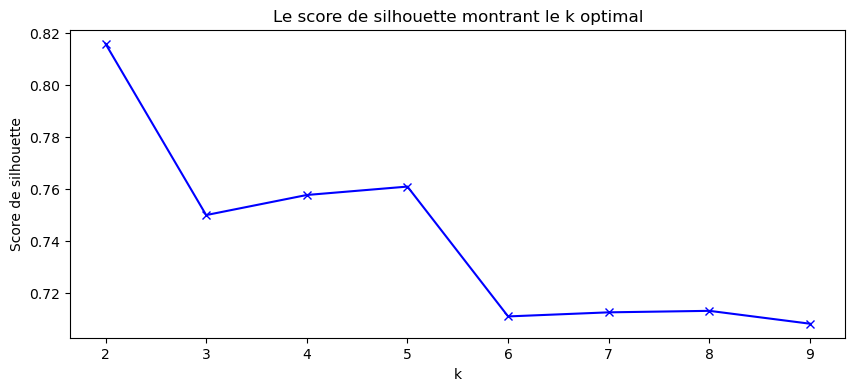

In [20]:
# Graphique du score de silhouette
plt.figure(figsize=(10,4))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('Score de silhouette')
plt.title('Le score de silhouette montrant le k optimal')
plt.show()


In [21]:
# Appliquer KMeans avec le nombre de clusters optimal trouvé (supposons que c'est 3 pour cet exemple)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_normalized)




/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [23]:
# Ajouter les labels de cluster au DataFrame
df['cluster_label'] = kmeans.labels_
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster_label
status_id,,,,,,,,,,,
246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0,0
246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0,0
246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0,0
246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0,0
246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1050855161656896_1061863470556065,photo,89,0,0,89,0,0,0,0,0,0
1050855161656896_1061334757275603,photo,16,0,0,14,1,0,1,0,0,0
1050855161656896_1060126464063099,photo,2,0,0,1,1,0,0,0,0,0


In [26]:
# Interprétation des groupes
# Afficher les statistiques des clusters
cluster_stats = df.groupby('cluster_label')[df_numeric.columns].mean()
cluster_stats


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
cluster_label,,,,,,,,,
0,109.779374,74.045179,16.552203,102.821999,5.996648,0.522350,0.286718,0.112069,0.037516
1,1823.311828,61.333333,11.645161,1817.534946,3.104839,2.435484,0.198925,0.032258,0.005376
2,538.492105,2728.015789,391.144737,418.002632,107.578947,3.805263,5.400000,2.376316,1.313158
3,1522.617647,1718.500000,750.264706,1088.617647,298.205882,101.941176,29.058824,2.970588,1.823529


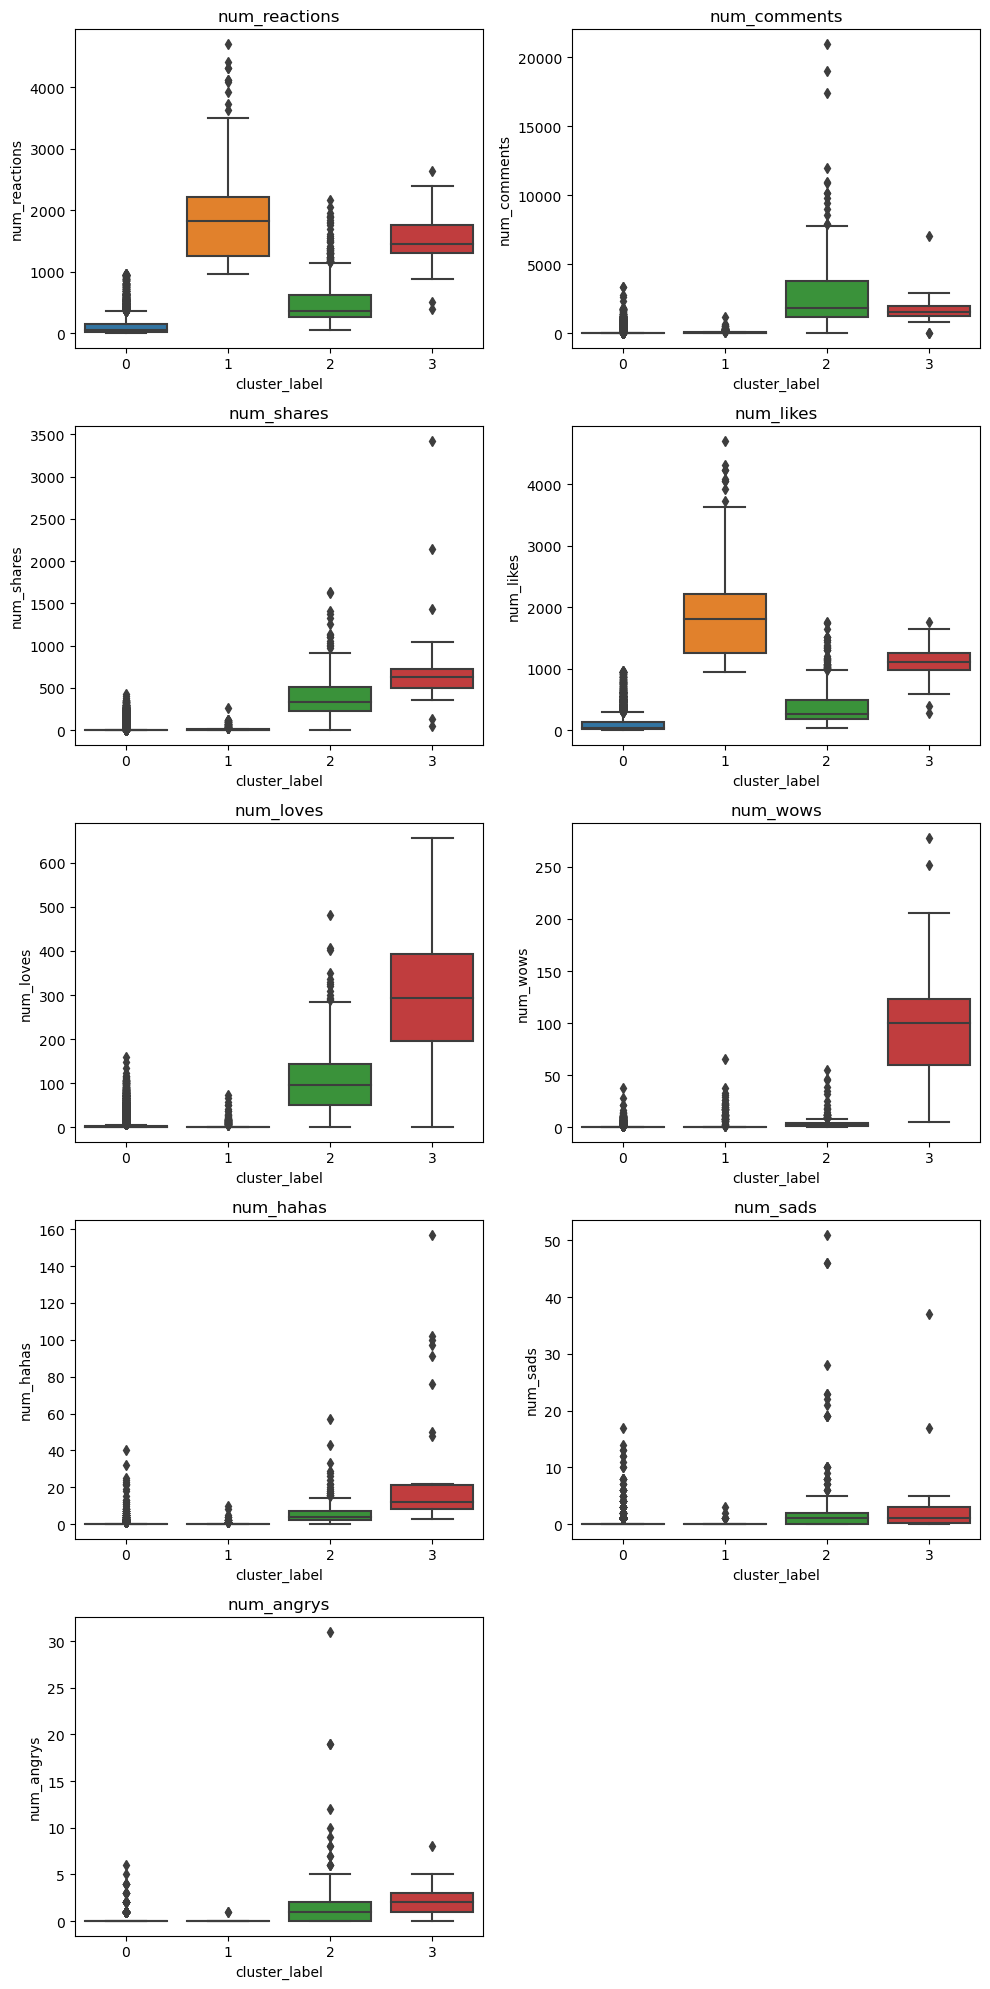

In [27]:
# Créer un boxplot pour chaque colonne numérique
num_cols = len(df_numeric.columns) # -1 pour exclure 'status_type'

# Nombre de lignes pour les sous-graphiques
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

plt.figure(figsize=(10, 4 * num_rows))
for i, column in enumerate(df_numeric.columns, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='cluster_label', y=column, data=df)
    plt.title(column)

plt.tight_layout()
plt.show()


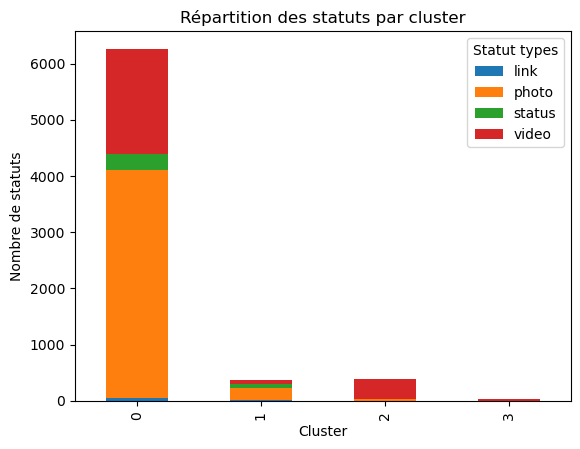

In [28]:
# Créer une table de contingence entre cluster_label et statut_types
contingency_table = pd.crosstab(df['cluster_label'], df['status_type'])

# Tracer le barplot
contingency_table.plot(kind='bar', stacked=True)

# Ajouter des étiquettes et des titres
plt.xlabel('Cluster')
plt.ylabel('Nombre de statuts')
plt.title('Répartition des statuts par cluster')

# Afficher la légende
plt.legend(title='Statut types')

# Afficher le graphique
plt.show()

In [ ]:
# Visualisation des groupes
sns.scatterplot(data=df, x='num_reactions', y='num_comments', hue='cluster_label', palette='Set1')
plt.title("Clusters K-means")
plt.show()